### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [9]:
# HW1-1
# 컴퓨터공학과 1971039 이진경

In [10]:
import numpy as np

In [11]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  return 1/(1+np.exp(-x))


# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  return sigmoid(x)*(1-sigmoid(x))


# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  return np.tanh(x)


# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  return 1 - (tanh(x)**2)

In [12]:
# Mean squared error function
#타깃과 출력값의 차이를 계산하는 함수
def MSE(O, T):
  # Problem 1.(b): fill here
  return np.sum((O-T)**2)/len(O) 


# Derivative of hyperbolic tangent function
def dMSE(O, T):
  # Problem 1.(b): fill here
  return O-T

  

In [13]:
class MLP:

  def __init__(self, learning_rate=0.01, n_epochs=5, n_inputs=2, n_hiddens=2, n_outputs=1):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None



  def _init_params(self):
    # Problem 1.(c): fill here
    # 랜덤으로 초기화시키자
    # W1: 2*2  B1: 2*1  W2: 1*2  B2: 1*1  #ppt 12쪽 참고
    
    np.random.seed(42)
    self.first_layer_weights = np.random.rand(self.n_hiddens,self.n_inputs)  #2*2
    self.first_layer_bias = np.random.rand(self.n_hiddens,1) #2*1
    self.second_layer_weights = np.random.rand(self.n_outputs,self.n_hiddens)  #1*2
    self.second_layer_bias = np.random.rand(self.n_outputs,1) #1*1




# X는 input batch, T는 ground truth
  def _forward(self, X, T): 
    # Problem 1.(d): fill here
    W1=self.first_layer_weights
    B1=self.first_layer_bias
    W2=self.second_layer_weights
    B2=self.second_layer_bias

    #계산
    Z1 = np.dot(W1,X)+B1
    A1=self.first_layer_activation_func(Z1)

    Z2=np.dot(W2,A1)+B2
    A2=self.second_layer_activation_func(Z2)

    if T is None: # predict()
      return A2

    else: # fit()
      loss=self.loss_func(A2,T)
      return Z1, A1, Z2, A2, loss


  def _backward(self, X, Z1, A1, Z2, A2, T): 
    # Problem 1.(e): fill here
    error2= np.multiply((A2-T),self.second_layer_dactivation_func(Z2))
    dW2= np.dot(error2,A1.T)
    dB2=np.sum(error2,axis=1)
    #dB2=np.sum(error2).reshape(self.n_outputs,1)

    error1=np.multiply(np.dot(self.second_layer_weights.T,error2), self.first_layer_dactivation_func(Z1))
    dW1=np.dot(error1,X.T)
    dB1=np.sum(error1,axis=1).reshape(self.n_hiddens,1)

    return dW1, dB1, dW2, dB2


  def predict(self, X):
    return self._forward(X, None)


  def fit(self, X, T):
    
    self._init_params()
    #loss_trace = []

    for i in range(self.n_epochs):
      Z1, A1, Z2, A2, loss = self._forward(X, T)
      dW1, dB1, dW2, dB2 = self._backward(X, Z1, A1, Z2, A2, T)
      
      # Problem 1.(f): fill here
      self.first_layer_weights = self.first_layer_weights - self.lr * dW1
      self.first_layer_bias = self.first_layer_bias - self.lr * dB1
      self.second_layer_weights = self.second_layer_weights - self.lr * dW2
      self.second_layer_bias = self.second_layer_bias - self.lr * dB2

      loss_trace.append(loss)

    return loss_trace

In [ ]:
# Problem 1.(g): fill here
# XOR문제
X = np.array([[0,0,1,1], [0,1,0,1]])
y = np.array([0.0, 1.0, 1.0, 0.0])

loss_trace = []
mlp=MLP(learning_rate=0.02, n_epochs=100000)
mlp.fit(X,y)


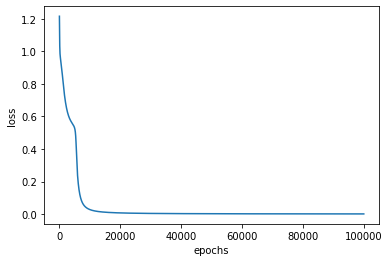

In [15]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [16]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.01674103 0.98747772 0.98727683 0.017582  ]]
